# **Projet Machine Learning**

**Réalisé par : Brahim Alaa & Zaafrane Fadi    IGL4**

# **Introduction au CIC-Darknet2020**

Le darknet représente une partie de l'internet qui n'est généralement pas censée interagir avec d'autres ordinateurs à l'échelle mondiale. Sa nature passive, où le trafic entrant est accepté mais le trafic sortant est restreint, fait du darknet un terrain propice à des activités suspectes, souvent associées à des sondes, du backscatter, ou des erreurs de configuration.

Le dataset CIC-Darknet2020 vise à faciliter l'étude du trafic darknet. Il combine deux jeux de données publics, ISCXTor2016 et ISCXVPN2016, pour créer un ensemble complet représentant le trafic Tor et VPN, deux types courants de trafic sur le darknet. Le dataset couvre diverses catégories de trafic, comme le streaming audio, la navigation, le chat, l'email, le P2P, le transfert, le streaming vidéo, et la VOIP.

Le CIC-Darknet2020 utilise une approche à deux niveaux pour générer du trafic bénin et du trafic darknet. Le premier niveau génère le trafic bénin, tandis que le second niveau ajoute les différentes catégories de trafic darknet. Les chercheurs ont utilisé des applications populaires telles que Vimeo, YouTube, Firefox, Chrome, Skype, et Facebook pour générer le trafic. Ce dataset constitue une base solide pour l'analyse et la classification du trafic darknet, avec des applications potentielles dans la détection de malware et la recherche en cybersécurité.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/darknet.csv')

In [ ]:
df.head(n=5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


# **Data Cleaning**

**Aperçu des données :**

Vérifier la forme (df.shape) et les noms des colonnes (df.columns) du DataFrame (df) donne un aperçu rapide de la structure des données et de leurs dimensions, ce qui aide à comprendre l'ensemble de données en un coup d'œil.

In [ ]:
df.shape

(141530, 85)

In [ ]:
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

**Informations sur les données :**

La fonction df.info() offre un résumé du DataFrame, y compris les types de données de chaque colonne, l'utilisation de la mémoire et le nombre d'entrées non nulles. Cela est utile pour identifier les colonnes avec des valeurs manquantes ou des types de données inattendus.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

**Comptage des valeurs :**

Vérifier les comptages de valeurs pour les colonnes comme 'Label' et 'Label.1' peut révéler la distribution des catégories dans ces colonnes, ce qui est essentiel pour comprendre l'équilibre des classes dans les tâches de classification.

In [ ]:
df['Label'].value_counts()

Label
Non-Tor    93356
NonVPN     23863
VPN        22919
Tor         1392
Name: count, dtype: int64

In [ ]:
df['Label.1'].value_counts()

Label.1
P2P                48520
Browsing           32808
Audio-Streaming    16580
Chat               11478
File-Transfer      11098
Video-Streaming     9486
Email               6145
VOIP                3566
AUDIO-STREAMING     1484
Video-streaming      281
File-transfer         84
Name: count, dtype: int64

Renommer les colonnes telles que 'Label' en 'Type de connexion' et **'Label.1'** en 'Label' qui va etre not variable **target**.

Et Mettre en majuscule les valeurs de la colonne **'Label'** standardise le format des données, les rendant plus cohérentes pour une analyse plus poussée.

In [ ]:
df.rename(columns={'Label': 'Connection Type'}, inplace=True)
df.rename(columns={'Label.1': 'Label'}, inplace=True)
df['Label'] = df['Label'].str.capitalize()
df['Label'].value_counts()

Label
P2p                48520
Browsing           32808
Audio-streaming    18064
Chat               11478
File-transfer      11182
Video-streaming     9767
Email               6145
Voip                3566
Name: count, dtype: int64

Le dataset contient des classifications multi-classes, avec plusieurs types distincts de trafic réseau. Il comprend huit classes différentes qui indiquent la diversité des activités dans le dataset.



> **Donc, il s'agit d'une classification multiclasse**



Gestion des valeurs manquantes :
Compter les valeurs manquantes et identifier les colonnes avec des valeurs manquantes est important pour comprendre la qualité et la complétude des données.

In [ ]:
df.isnull().sum()
df.isnull().sum().sum()

47

In [ ]:
# Get Columns that have missing values
missing = df.columns[df.isnull().any()].tolist()
print(missing)

['Flow Bytes/s']


 Dans ce cas, comme il n'y a que 47 valeurs manquantes dans la colonne `'Flow Bytes/s'` (une petite proportion de l'ensemble de données de 141 530 lignes), supprimer ces lignes semble être une approche raisonnable.

In [ ]:
df.dropna(inplace=True)
df.shape

(141483, 85)

**Suppression des doublons :**

Supprimer les entrées dupliquées de l'ensemble de données permet d'éviter la redondance et d'éventuels biais dans l'analyse.

In [ ]:
# Remove duplicate entries
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)


**Suppression des colonnes constantes :**

Supprimer les colonnes ayant une seule valeur unique (colonnes constantes) peut améliorer les performances du modèle en se concentrant sur des caractéristiques plus informatives.

In [ ]:
# Remove constant columns
df = df.loc[:, df.apply(pd.Series.nunique) != 1]

# Look at the dataset again
print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Columns: {df.shape[1]}')
df.head()

Number of Rows: 117026
Number of Columns: 70


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Connection Type,Label
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,1892,1047,0,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Audio-streaming
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,1987,1047,0,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Audio-streaming
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,2049,1047,0,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Audio-streaming
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,2008,1047,0,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Audio-streaming
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,1382,2320,581,20,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,Audio-streaming


In [ ]:
df.shape

(117026, 70)

**Vérification des valeurs infinies :**

Identifier les lignes avec des valeurs infinies (np.inf et -np.inf) est crucial, car ces valeurs peuvent causer des problèmes dans les modèles statistiques et de machine learning.

In [ ]:
invalid_rows = df[df.isin([np.inf, -np.inf]).any(axis=1)]
invalid_rows

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Connection Type,Label
35853,10.152.152.11-54.230.228.31-47339-443-6,10.152.152.11,47339,54.230.228.31,443,6,27/07/2015 01:38:59 PM,0,1,1,...,1583,1583,0,20,0.0,0.0,0.0,0.0,Non-Tor,File-transfer
89042,10.152.152.11-193.33.5.18-44696-443-6,10.152.152.11,44696,193.33.5.18,443,6,15/07/2015 11:01:30 AM,0,2,0,...,1125,0,0,20,0.0,0.0,0.0,0.0,Non-Tor,Video-streaming


In [ ]:
df.drop(invalid_rows.index, inplace=True)

**Vérification des colonnes avec faible variance :**

In [ ]:
from sklearn.feature_selection import VarianceThreshold

non_numeric_columns = df.select_dtypes(include="object").columns

# Drop the non-numeric column before applying VarianceThreshold
df_numeric = df.drop(non_numeric_columns, axis=1)

# Apply VarianceThreshold with a threshold of 0.1
selector = VarianceThreshold(threshold=0.15)

# Fit the selector to the DataFrame
selector.fit(df_numeric)

# Get the column names of the features that have high variance
high_variance_columns = df_numeric.columns[selector.get_support()]

# Features that are not in the high_variance_columns are those with low variance
low_variance_columns = df_numeric.columns.difference(high_variance_columns)

df.drop(low_variance_columns.to_list(), axis=1, inplace=True)

print("Features with low variance:")
print(low_variance_columns)


Features with low variance:
Index(['Fwd PSH Flags', 'RST Flag Count'], dtype='object')


# **Exploration des données qualitatives**

<Axes: xlabel='count', ylabel='Label'>

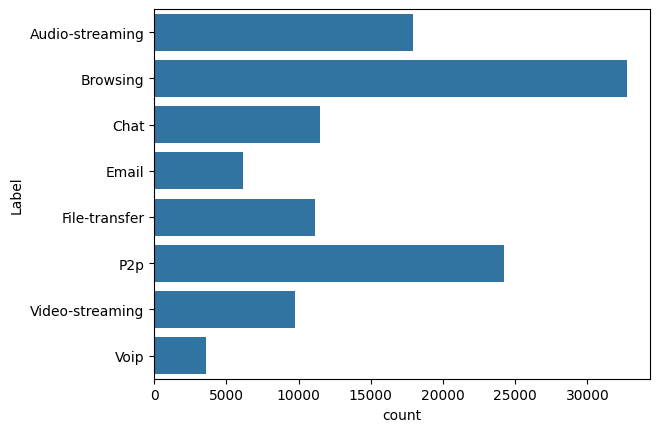

In [ ]:
sns.countplot(df['Label'])

In [ ]:
# Get columns that are categorical
cat_columns = df.select_dtypes(include=['object']).columns
cat_columns

Index(['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Connection Type', 'Label'], dtype='object')

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp'] = df['Timestamp'].apply(lambda x: x.timestamp())

<ipython-input-354-228e381cffef>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [ ]:
df[cat_columns].head()

,Flow ID,Src IP,Dst IP,Timestamp,Connection Type,Label
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,216.58.220.99,1.437754e+09,Non-Tor,Audio-streaming
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,216.58.220.99,1.437754e+09,Non-Tor,Audio-streaming
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,216.58.220.99,1.437754e+09,Non-Tor,Audio-streaming
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,74.125.136.120,1.437754e+09,Non-Tor,Audio-streaming
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,173.194.65.127,1.437754e+09,Non-Tor,Audio-streaming


In [ ]:
df[['Flow ID', 'Src IP', 'Dst IP', 'Src Port', 'Dst Port', 'Protocol']].head()

,Flow ID,Src IP,Dst IP,Src Port,Dst Port,Protocol
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,216.58.220.99,57158,443,6
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,216.58.220.99,57159,443,6
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,216.58.220.99,57160,443,6
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,74.125.136.120,49134,443,6
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,173.194.65.127,34697,19305,6



La feature `Flow ID` est un identifiant pour chaque flux. Nous avons observé plus haut que le `Flow ID` est une concaténation de l'`IP source`, de l'`IP destination`, du port source, du port destination et du protocole. Par conséquent, nous pouvons supprimer la feature `Flow ID` et conserver les autres features.

In [ ]:
df.drop(['Flow ID'], axis=1, inplace=True)

In [ ]:
df['Src IP'].unique().shape

(3906,)

In [ ]:
# Regex that matches private IP addresses : \b(?!(10)|192\.168|172\.(2[0-9]|1[6-9]|3[0-2]))[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}
# Filter private IP addresses from the 'Src IP' column and a new feature 'Src Private IP' to the dataframe
df['Src Private IP'] = df['Src IP'].str.contains(r'\b(?!(10)|192\.168|172\.(2[0-9]|1[6-9]|3[0-2]))[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}')

<ipython-input-359-20bb92c66f1b>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['Src Private IP'] = df['Src IP'].str.contains(r'\b(?!(10)|192\.168|172\.(2[0-9]|1[6-9]|3[0-2]))[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}')


In [ ]:
df['Dst Private IP'] = df['Dst IP'].str.contains(r'\b(?!(10)|192\.168|172\.(2[0-9]|1[6-9]|3[0-2]))[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}')

<ipython-input-360-a2baefa87a24>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['Dst Private IP'] = df['Dst IP'].str.contains(r'\b(?!(10)|192\.168|172\.(2[0-9]|1[6-9]|3[0-2]))[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}')


In [ ]:
df.head(n=10)

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,...,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Connection Type,Label,Src Private IP,Dst Private IP
0,10.152.152.11,57158,216.58.220.99,443,6,1.437754e+09,229,1,1,0,...,0,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Audio-streaming,False,True
1,10.152.152.11,57159,216.58.220.99,443,6,1.437754e+09,407,1,1,0,...,0,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Audio-streaming,False,True
2,10.152.152.11,57160,216.58.220.99,443,6,1.437754e+09,431,1,1,0,...,0,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Audio-streaming,False,True
3,10.152.152.11,49134,74.125.136.120,443,6,1.437754e+09,359,1,1,0,...,0,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Audio-streaming,False,True
4,10.152.152.11,34697,173.194.65.127,19305,6,1.437754e+09,10778451,591,400,64530,...,581,20,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,Audio-streaming,False,True
5,10.152.152.11,54570,173.194.65.127,443,6,1.437754e+09,421362,5,3,72,...,1,20,1.437765e+15,1.866111e+05,1.437765e+15,1.437765e+15,Non-Tor,Audio-streaming,False,True
6,173.194.33.97,443,10.152.152.11,56254,6,1.437754e+09,119682119,488,487,89259,...,209,20,1.437765e+15,3.184630e+07,1.437765e+15,1.437765e+15,Non-Tor,Audio-streaming,True,False
7,10.152.152.11,57361,216.58.216.142,443,6,1.437754e+09,116996934,369,378,208796,...,268,20,1.437765e+15,3.617028e+07,1.437765e+15,1.437765e+15,Non-Tor,Audio-streaming,False,True
8,74.125.28.189,443,10.152.152.11,44097,6,1.437754e+09,100279453,61,60,14526,...,31,20,1.437765e+15,3.327790e+07,1.437765e+15,1.437765e+15,Non-Tor,Audio-streaming,True,False
9,10.152.152.11,34702,173.194.65.127,19305,6,1.437754e+09,119962833,3638,3157,254101,...,2775,20,1.437765e+15,3.298254e+07,1.437765e+15,1.437765e+15,Non-Tor,Audio-streaming,False,True


In [ ]:
df.shape

(117024, 69)

<Axes: xlabel='Label', ylabel='count'>

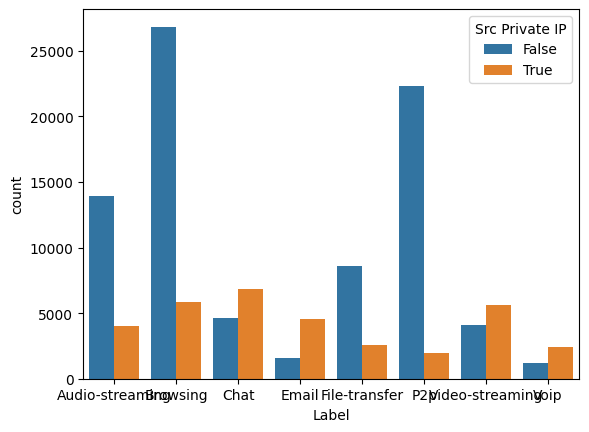

In [ ]:
# Visualize the relationship between 'Src Private IP' and 'Label'
df.groupby('Label')['Src Private IP'].value_counts()
sns.countplot(x='Label', hue='Src Private IP', data=df)

<Axes: xlabel='Label', ylabel='count'>

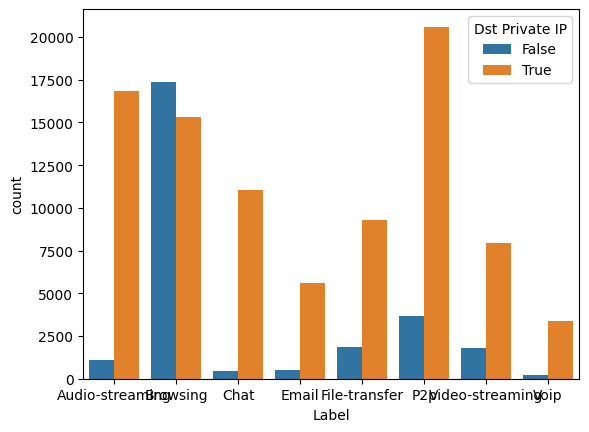

In [ ]:
# Visualize the relationship between 'Dst Private IP' and 'Label'
df.groupby('Label')['Dst Private IP'].value_counts()
sns.countplot(x='Label', hue='Dst Private IP', data=df)

In [ ]:
df['Src IP'].unique()

array(['10.152.152.11', '173.194.33.97', '74.125.28.189', ...,
       '184.27.206.8', '191.232.139.4', '134.170.58.123'], dtype=object)

In [ ]:
df['Dst IP'].unique()

array(['216.58.220.99', '74.125.136.120', '173.194.65.127', ...,
       '10.8.8.245', '202.118.1.81', '5.45.97.110'], dtype=object)

Certaines adresses IP publiques peuvent correspondre à un site web spécifique, ce qui peut nous aider à identifier le type de trafic. Par exemple, l'adresse IP `216.58.220.99` est une adresse IP de Google. Nous pouvons utiliser cette information pour identifier que le type de trafic est `Navigation sur le web.`

Nous ajouterons une nouvelle feature qui encode le type de trafic en fonction de l'adresse IP publique.

In [ ]:
ips_list = df['Src IP'].unique().tolist() + df['Dst IP'].unique().tolist()
unique_ips = list(set(ips_list))
unique_ips

['79.19.192.45',
 '188.125.82.57',
 '111.110.21.217',
 '74.125.226.27',
 '199.83.135.155',
 '176.221.7.4',
 '213.37.29.248',
 '52.29.236.159',
 '112.220.126.126',
 '95.131.137.7',
 '119.158.41.21',
 '23.3.90.202',
 '82.183.27.192',
 '171.101.209.148',
 '54.239.192.52',
 '124.96.64.15',
 '54.230.97.176',
 '104.16.24.235',
 '177.100.83.28',
 '52.16.223.226',
 '2.30.116.54',
 '54.236.2.143',
 '92.2.166.128',
 '201.145.130.93',
 '187.131.78.9',
 '203.192.210.73',
 '54.230.52.100',
 '85.26.42.231',
 '85.214.124.106',
 '175.135.35.13',
 '85.30.181.157',
 '64.251.188.25',
 '77.36.167.226',
 '54.228.225.215',
 '176.32.98.168',
 '176.197.42.229',
 '173.194.65.101',
 '98.138.243.53',
 '173.194.112.141',
 '96.33.14.91',
 '216.58.210.2',
 '46.228.164.20',
 '216.58.213.100',
 '54.192.3.228',
 '41.101.220.194',
 '23.97.219.200',
 '173.194.116.204',
 '119.149.106.67',
 '138.94.116.77',
 '131.202.240.69',
 '74.125.30.120',
 '216.58.211.98',
 '178.141.47.182',
 '173.194.65.138',
 '216.58.219.194',
 '10

Filtrage des IP Publiques :

Créer une liste d'adresses IP publiques à partir de unique_ips en excluant celles qui commencent par '10.', '192.168' ou '172.', qui représentent des plages IP privées.

In [ ]:
# Leave only public IP addresses
public_ips = [ip for ip in unique_ips if not ip.startswith('10.') and not ip.startswith('192.168') and not ip.startswith('172.')]

In [ ]:
# Make IP addresses to be integers mapping
ip_to_int = {ip: i for i, ip in enumerate(public_ips)}

Mapper les Organisations des IP dans le DataFrame :

Ajouter deux nouvelles colonnes au DataFrame df : 'Src IP Organization' et 'Dst IP Organization'. Ces colonnes sont peuplées en utilisant le mapping public_to_org pour identifier l'organisation source et l'organisation de destination pour le trafic réseau.

In [ ]:
import json
with open("p²n", "r") as f:
    public_to_org = json.load(f)
public_to_org

{'68.39.103.211': 'Comcast Corporation',
 '67.202.66.173': 'Domains By Proxy, LLC',
 '52.5.153.86': 'Amazon.com, Inc.',
 '125.164.29.163': 'Unknown',
 '14.162.149.34': 'Unknown',
 '157.55.56.152': 'Unknown',
 '217.12.1.155': 'Yahoo Assets LLC',
 '185.21.217.21': 'Feral.io Ltd',
 '23.92.189.52': 'Unknown',
 '216.66.76.36': 'Unknown',
 '173.194.40.238': 'Unknown',
 '168.235.82.119': 'Unknown',
 '46.228.164.20': 'Unknown',
 '23.33.188.244': 'Akamai Technologies, Inc.',
 '150.107.213.145': 'Unknown',
 '27.59.229.34': 'Unknown',
 '217.147.88.119': 'Unknown',
 '87.91.213.33': 'Unknown',
 '119.39.156.196': 'Unknown',
 '198.245.61.44': 'Unknown',
 '54.174.171.237': 'Amazon.com, Inc.',
 '74.125.232.109': 'Unknown',
 '46.236.12.250': 'Not Disclosed',
 '212.184.129.160': 'Unknown',
 '92.99.216.219': 'Unknown',
 '80.97.59.198': 'Unknown',
 '124.181.104.191': 'Telstra Corporation Ltd',
 '54.192.229.198': 'Unknown',
 '87.114.94.45': 'Unknown',
 '131.202.243.96': 'Unknown',
 '52.28.171.120': 'Amazon.

In [ ]:
df['Src IP Organization'] = df['Src IP'].map(public_to_org)
df['Dst IP Organization'] = df['Dst IP'].map(public_to_org)

In [ ]:
df[(df['Src IP Organization'] == df['Dst IP Organization']) & (df['Src IP Organization'] != pd.NA) & (df['Src IP Organization'] != "Unknown")]

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,...,Idle Mean,Idle Std,Idle Max,Idle Min,Connection Type,Label,Src Private IP,Dst Private IP,Src IP Organization,Dst IP Organization


In [ ]:
df.isnull().sum().sum()

106077

In [ ]:
df['IP Organization'] = df['Src IP Organization'].fillna(df['Dst IP Organization'])

Pour combiner les colonnes de l'organisation source (`Src IP Organization`) et de l'organisation de destination (`Dst IP Organization`) en une seule feature, vous pouvez utiliser la logique suivante :

Si l'un des champs est null, utilisez l'autre.
Si les deux champs sont inconnus, attribuez la valeur `Unknown`.


L'objectif de cette méthode est de créer une nouvelle feature qui synthétise les informations des deux organisations `IP Organization`, en tenant compte des valeurs manquantes ou indéterminées. Cette approche offre une flexibilité dans l'analyse des données tout en assurant qu'une valeur significative est attribuée même si certaines informations sont manquantes.

In [ ]:
df['IP Organization'] = df['Src IP Organization'].fillna(df['Dst IP Organization'])
df[df['IP Organization'] != "Unknown"]

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,...,Idle Std,Idle Max,Idle Min,Connection Type,Label,Src Private IP,Dst Private IP,Src IP Organization,Dst IP Organization,IP Organization
8,74.125.28.189,443,10.152.152.11,44097,6,1.437754e+09,100279453,61,60,14526,...,3.327790e+07,1.437765e+15,1.437765e+15,Non-Tor,Audio-streaming,True,False,Google LLC,NaN,Google LLC
14,10.152.152.11,41995,74.125.136.132,443,6,1.437754e+09,101242010,18,18,1490,...,2.071678e+07,1.437765e+15,1.437765e+15,Non-Tor,Audio-streaming,False,True,NaN,Google LLC,Google LLC
17,10.152.152.11,47874,173.194.65.102,443,6,1.437754e+09,90104287,3,3,0,...,3.678432e+07,1.437765e+15,1.437765e+15,Non-Tor,Audio-streaming,False,True,NaN,Google LLC,Google LLC
19,10.152.152.11,57468,173.194.65.138,443,6,1.437754e+09,104202473,40,50,13968,...,1.426815e+07,1.437765e+15,1.437765e+15,Non-Tor,Audio-streaming,False,True,NaN,Google LLC,Google LLC
20,10.152.152.11,57457,173.194.65.138,443,6,1.437754e+09,90176018,3,3,0,...,3.681355e+07,1.437765e+15,1.437765e+15,Non-Tor,Audio-streaming,False,True,NaN,Google LLC,Google LLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140975,10.8.8.246,64162,8.8.8.8,53,17,1.432305e+09,125356,1,1,40,...,0.000000e+00,0.000000e+00,0.000000e+00,VPN,Voip,False,True,NaN,"Charleston Road Registry, Inc.","Charleston Road Registry, Inc."
141118,10.8.8.246,137,10.8.8.247,137,17,1.432305e+09,111299506,66,0,3300,...,2.841549e+07,1.432316e+15,1.432316e+15,VPN,Voip,False,False,NaN,NaN,NaN
141238,10.8.8.246,64162,8.8.8.8,53,17,1.432305e+09,124472,1,1,40,...,0.000000e+00,0.000000e+00,0.000000e+00,VPN,Voip,False,True,NaN,"Charleston Road Registry, Inc.","Charleston Road Registry, Inc."
141321,10.8.8.246,68,10.8.8.245,67,17,1.432303e+09,53,1,1,301,...,0.000000e+00,0.000000e+00,0.000000e+00,VPN,Voip,False,False,NaN,NaN,NaN


Les colonnes `Src IP Organization` et `Dst IP Organization` ont été supprimées du DataFrame. Le nombre total de valeurs nulles restantes a ensuite été vérifié, et toutes les valeurs nulles ont été remplacées par `Nothing`. Cette approche assure la cohérence du DataFrame et évite les problèmes liés aux données incomplètes.

In [ ]:
df.drop(['Src IP Organization', 'Dst IP Organization'], axis=1, inplace=True)
df.isnull().sum().sum()

12351

In [ ]:
df.fillna("Nothing", inplace=True)

In [ ]:
df[(df["Src Private IP"] == False) & (df["Dst Private IP"] == False)]['IP Organization'].value_counts()

IP Organization
Nothing                                                                               12333
Unknown                                                                                2794
Newfold Digital, Inc.                                                                   218
Akamai Technologies, Inc.                                                               186
AT&T SERVICES, INC.                                                                     134
Amazon.com, Inc.                                                                         53
Verizon Trademark Services LLC                                                           52
JSC "ER-Telecom Holding"                                                                 51
REDACTED FOR PRIVACY                                                                     44
Whois Privacy Protection Service, Inc.                                                   43
JSC "Telecom.ru"                                                

In [ ]:
df.isnull().sum().sum()

0


Une représentation visuelle a été créée pour afficher uniquement les lignes où le nombre d'occurrences de `IP Organization` dépasse 200, à l'aide d'un graphique Seaborn de type "countplot" montrant la distribution des labels, tout en excluant les organisations `Nothing` et `Unknown` pour se concentrer sur les valeurs significatives.

<Axes: xlabel='Label', ylabel='count'>

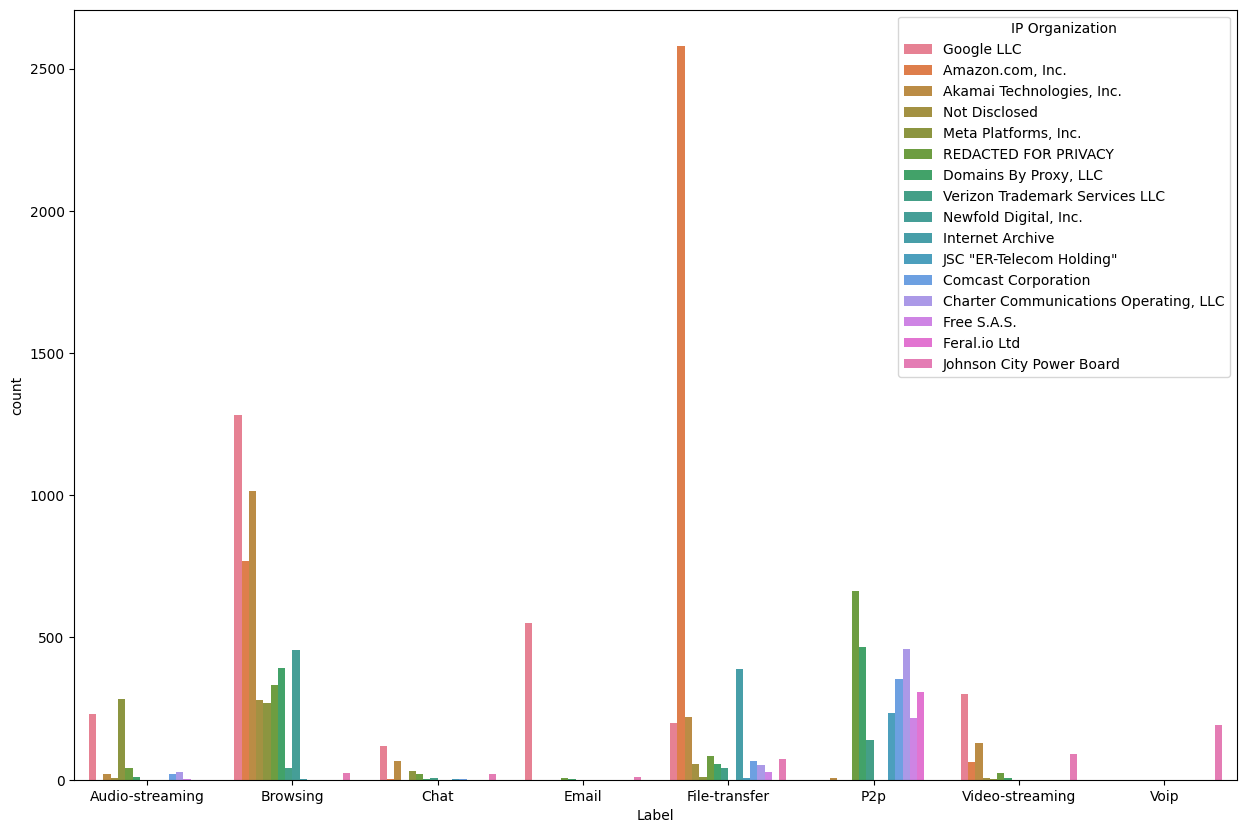

In [ ]:
df['IP Organization'] = df['IP Organization'].astype(str)
plt.figure(figsize=(15, 10))
sns.countplot(x='Label', hue='IP Organization', data=df[(df['IP Organization'].map(df['IP Organization'].value_counts()) > 200) & (df['IP Organization'] != "Nothing") & (df['IP Organization'] != "Unknown")])

In [ ]:
df['IP Organization'].value_counts()

IP Organization
Unknown                                  85920
Nothing                                  12351
Amazon.com, Inc.                          3413
Google LLC                                2686
Akamai Technologies, Inc.                 1460
                                         ...  
2DAY Telecom LLP                             1
TV Azteca                                    1
PJSC "MTS" branch "Makro-region "Yug"        1
Joint Stock Company CROC Incorporated        1
Registrant of nexellent.net                  1
Name: count, Length: 248, dtype: int64

In [ ]:
df['IP Organization'].unique().shape

(248,)

In [ ]:
# Count IP Organization that have only one occurence
df['IP Organization'].value_counts()[df['IP Organization'].value_counts() < 50].shape

(209,)

In [ ]:
df.drop(["Src IP", "Dst IP"], axis=1, inplace=True)

# **Model Training Using simple Pipeline**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('Label')
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()
print(f"Categorical Features:\n{categorical_features}\n\n")
print(f"Numerical Features:\n{numerical_features}")

Categorical Features:
['Connection Type', 'IP Organization']


Numerical Features:
['Src Port', 'Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'Down/Up Ratio', 'Average Packet 

In [ ]:
for feature in categorical_features:
  df[feature] = df[feature].astype('category')
  df[feature] = df[feature].cat.codes

In [ ]:
df

,Src Port,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,...,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Connection Type,Label,Src Private IP,Dst Private IP,IP Organization
0,57158,443,6,1.437754e+09,229,1,1,0,0,0,...,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,Audio-streaming,False,True,209
1,57159,443,6,1.437754e+09,407,1,1,0,0,0,...,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,Audio-streaming,False,True,209
2,57160,443,6,1.437754e+09,431,1,1,0,0,0,...,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,Audio-streaming,False,True,209
3,49134,443,6,1.437754e+09,359,1,1,0,0,0,...,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,Audio-streaming,False,True,209
4,34697,19305,6,1.437754e+09,10778451,591,400,64530,6659,131,...,20,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,0,Audio-streaming,False,True,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,55219,5355,17,1.432303e+09,411806,2,0,44,0,22,...,8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,Voip,False,True,209
141526,64207,5355,17,1.432304e+09,411574,2,0,44,0,22,...,8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,Voip,False,True,209
141527,61115,5355,17,1.432304e+09,422299,2,0,44,0,22,...,8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,Voip,False,True,209
141528,64790,5355,17,1.432305e+09,411855,2,0,44,0,22,...,8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,Voip,False,True,209


In [ ]:
categorical_transformer = OrdinalEncoder()
numerical_transformer = StandardScaler()

In [ ]:
# Column transformer to apply transformations to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

# Define a simple pipeline with a classifier
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))  # you can replace with other classifiers
])


In [ ]:
# Splitting the data into train and test sets
X = df.drop('Label', axis=1)
y = df['Label']  # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # features


In [ ]:
# df = pd.DataFrame(
#     preprocessor.fit_transform(df),
#     columns=df.columns.tolist().remove("Label")  # Preserve the original column names
# )

In [ ]:
# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train)

# Using the pipeline to predict on test data
predictions = pipeline.predict(X_test)

print("Predictions:", predictions)

Predictions: ['Audio-streaming' 'File-transfer' 'P2p' ... 'Browsing' 'Email' 'P2p']


In [ ]:
# Evaluate the model accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8847254860072634


# **Select features using PCA**

## Visualisation 3d des differentes classes

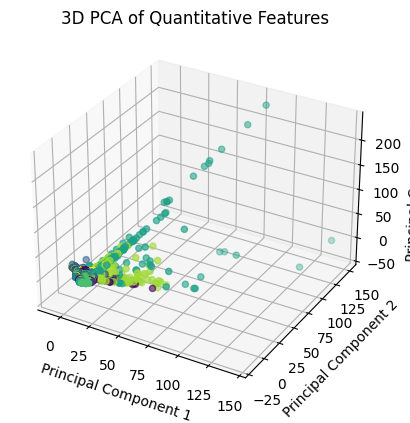

Explained variance ratio: [0.1852671  0.12361994 0.08691375]
Total variance: 0.3958007936053319


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Standardize the quantitative features (important for PCA)
scaler = StandardScaler()
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()

scaled_data = scaler.fit_transform(df[numerical_features])

# Perform PCA, keeping the first two principal components for visualization
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to the DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
df['PCA3'] = pca_result[:, 2]

# 3D scatter plot of the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with 'Connection Type' as hue
scatter = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['Label'].astype('category').cat.codes, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA of Quantitative Features')

# Add legend
plt.show()

# Optional: Display the explained variance ratio for the first three components
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance:", sum(pca.explained_variance_ratio_))


La varinace preservée dans la dataset si on se limite a 3 composantes principales est tres faible.

## Déterminer le nombre de composants necessaires pour avoir 80% de la variance:

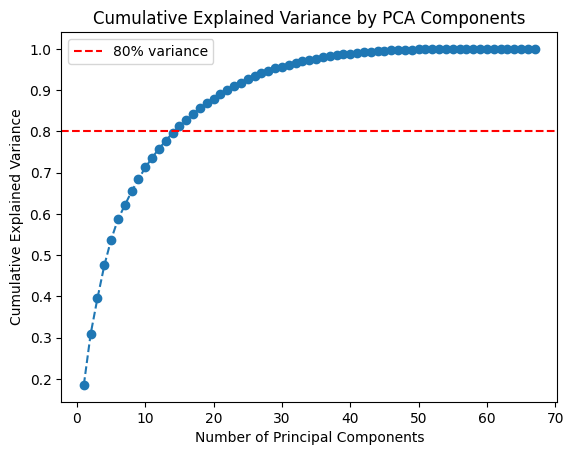

Number of components required to cover 80% of the variance: 15


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_features])

# Perform PCA with enough components to cover most of the data
pca = PCA(n_components=len(numerical_features))
pca_result = pca.fit(scaled_data)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance to visualize it
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()

# Determine the number of components required to cover 80% of the variance
num_components = np.argmax(cumulative_variance >= 0.8) + 1
print("Number of components required to cover 80% of the variance:", num_components)

## Selection des composants et entrainement des models

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

target = 'Label'

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_features])

# Perform PCA to find components covering at least 80% of the variance
pca = PCA(n_components=len(numerical_features))
pca_result = pca.fit_transform(scaled_data)

# Determine the number of components required to cover 80% of the variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
num_components = cumulative_variance.searchsorted(0.8)

# Select only the necessary PCA components
reduced_data = pca_result[:, :num_components]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reduced_data, df[target], test_size=0.2, random_state=42)

### KNN

In [ ]:
# Train a KNN model
rf = KNeighborsClassifier(n_neighbors=3)
rf.fit(X_train, y_train)

# Predict the test set and evaluate accuracy
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Model accuracy:", accuracy)
print("Classification report:")
print(classification_rep)

Model accuracy: 0.8787865840632344
Classification report:
                 precision    recall  f1-score   support

Audio-streaming       0.84      0.87      0.86      3586
       Browsing       0.94      0.95      0.95      6578
           Chat       0.78      0.75      0.77      2210
          Email       0.71      0.72      0.71      1209
  File-transfer       0.83      0.79      0.81      2268
            P2p       0.99      0.98      0.98      4904
Video-streaming       0.75      0.72      0.73      1963
           Voip       0.84      0.89      0.86       687

       accuracy                           0.88     23405
      macro avg       0.83      0.84      0.83     23405
   weighted avg       0.88      0.88      0.88     23405



### Deep Learing with tensorflow and keras

In [ ]:
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


X = reduced_data
y = df['Label'].values

# # ensure all data are floating point values
X = X.astype('float32')
# # encode strings to integer
y = LabelEncoder().fit_transform(y)
# # split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
label_count = df['Label'].nunique()
model.add(Dense(n_features, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(label_count, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

(78406, 14) (38618, 14) (78406,) (38618,)
Epoch 1/20
2451/2451 [==============================] - 7s 2ms/step - loss: 0.8140 - accuracy: 0.7025
Epoch 2/20
2451/2451 [==============================] - 8s 3ms/step - loss: 0.5950 - accuracy: 0.7665
Epoch 3/20
2451/2451 [==============================] - 6s 2ms/step - loss: 0.5325 - accuracy: 0.7860
Epoch 4/20
2451/2451 [==============================] - 8s 3ms/step - loss: 0.4879 - accuracy: 0.7982
Epoch 5/20
2451/2451 [==============================] - 7s 3ms/step - loss: 0.4556 - accuracy: 0.8095
Epoch 6/20
2451/2451 [==============================] - 8s 3ms/step - loss: 0.4319 - accuracy: 0.8175
Epoch 7/20
2451/2451 [==============================] - 7s 3ms/step - loss: 0.4143 - accuracy: 0.8208
Epoch 8/20
2451/2451 [==============================] - 8s 3ms/step - loss: 0.3965 - accuracy: 0.8283
Epoch 9/20
2451/2451 [==============================] - 7s 3ms/step - loss: 0.3855 - accuracy: 0.8322
Epoch 10/20
2451/2451 [=================

# **Select Features using other method**

In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import IsolationForest, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier, OutputCodeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### CONSTANTS
SEED = 123
NUM_FEATURES = 12
TRAIN_PCT = 0.75

MAX_DEPTH = 4
MAX_ITER = 200
N_NEIGHBORS = 5

In [ ]:
def selectFeatures(X, y, train_size_pct=0.75):
    """
    selectFeatures
        x : The features of the dataset to be used for predictions
        y : The target class for each row in "x"
        train_size_pct : (default = 0.75) In the tange (0.0, 1.0), the ratio by which to split the data for training and testing
        @return (list) The names of the selected features
    """

    # Create classifiers
    rf = RandomForestClassifier(max_depth=MAX_DEPTH, criterion='entropy', random_state=SEED)
    et = ExtraTreesClassifier(max_depth=MAX_DEPTH, criterion='entropy', random_state=SEED)
    dectree = DecisionTreeClassifier(max_depth=MAX_DEPTH, random_state=SEED)

    classifier_mapping = {
        "RandomForest" : rf,
        "ExtraTrees" : et,
        "DecisionTree" : dectree
    }

    ### Split the dataset
    X_train_fs, X_test_fs, Y_train_fs, Y_test_fs = train_test_split(X, y, train_size=train_size_pct)
    print(X_train_fs.shape, Y_train_fs.shape)

    model_features = {}

    for model_name, model in classifier_mapping.items():
        print(f'[Training] {model_name}')
        start_train = datetime.now()
        model.fit(X_train_fs, Y_train_fs)
        print(">>> Training Time: {}".format(datetime.now() - start_train))
        model_features[model_name] = model.feature_importances_
        model_score = model.score(X_test_fs, Y_test_fs)
        print(f'>>> Training Accuracy : {model_score*100.0}')
        print("")

    cols = X.columns.values
    feature_df = pd.DataFrame({'features': cols})
    for model_name, model in classifier_mapping.items():
        feature_df[model_name] = model_features[model_name]

    ### Grab the nlargest features (by score) from each ensemble group
    all_f = []
    for model_name, model in classifier_mapping.items():
        try:
            all_f.append(feature_df.nlargest(NUM_FEATURES, model_name))
        except KeyError as e:
            print(f'*** Failed to add features for {model_name} : {e}')

    result = []
    for i in range(len(all_f)):
        result.extend(all_f[i]['features'].to_list())		# Concat the top nlargest scores from all groups into one list

    # selected_features contains the ensemble results for best features
    selected_features = list(set(result))					# Drop duplicate fields from the list

    return selected_features
X = df.drop(['Label'], axis=1)
y = df['Label']
selected_features = selectFeatures(X, y)
print(selected_features)

(87768, 70) (87768,)
[Training] RandomForest
>>> Training Time: 0:00:34.119618
>>> Training Accuracy : 75.17090511348098

[Training] ExtraTrees
>>> Training Time: 0:00:03.131245
>>> Training Accuracy : 66.32485643970467

[Training] DecisionTree
>>> Training Time: 0:00:03.209730
>>> Training Accuracy : 82.78301886792453

['PCA1', 'Protocol', 'Connection Type', 'Src Private IP', 'Subflow Fwd Packets', 'Total Bwd packets', 'Idle Mean', 'Flow Duration', 'Subflow Bwd Bytes', 'Fwd Packet Length Max', 'Timestamp', 'Total Fwd Packet', 'Fwd Seg Size Min', 'Bwd Packets/s', 'Idle Max', 'Flow IAT Min', 'Dst Private IP', 'Src Port', 'Total Length of Fwd Packet', 'Idle Min', 'Bwd Packet Length Min', 'IP Organization', 'PCA2', 'Total Length of Bwd Packet', 'Flow Bytes/s', 'FIN Flag Count', 'Dst Port']


In [ ]:
def calculateMetrics(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average="macro")
    precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
    mse = mean_squared_error(y_test, y_pred)
    f1score = f1_score(y_pred, y_test, average='weighted')
    print(">>> Metrics")
    print(f'- Accuracy  : {acc}')
    print(f'- Recall    : {recall}')
    print(f'- Precision : {precision}')
    print(f'- MSE       : {mse}')
    print(f'- F1 Score  : {f1score}')

    return [round(acc, 6), round(recall, 6), round(precision, 6), round(mse, 6), round(f1score, 6)]

In [ ]:
def train_test_model(model_name, model, x, y, train_size_pct):

    max_depth_x2 = MAX_DEPTH * 2

    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=train_size_pct)

    # Training
    print(f'\n[Training] {model_name}')
    start_train = datetime.now()
    model.fit(X_train, Y_train)
    print(f'>>> Training time: {datetime.now() - start_train}')

    ### Analyze Training
    train_acc = model.score(X_train, Y_train)
    print(f'>>> Training accuracy: {train_acc}')

    ### Testing
    start_predict = datetime.now()
    y_pred = model.predict(X_test)
    print(f'>>> Testing time: {datetime.now() - start_predict}')

    ### Analyze Testing
    calculateMetrics(Y_test, y_pred)

    ### Confusion matrix
    if(model_name == f'RandomForest-{max_depth_x2}'):
      # Générez la matrice de confusion
      conf_matrix = confusion_matrix(Y_test, y_pred)

      # Affichez la matrice de confusion
      disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
      disp.plot(cmap=plt.cm.Blues)
      plt.title('Matrice de confusion')
      plt.show()

In [ ]:
def evaluateIndividualClassifiers(x, y, train_size_pct):
    """
    evaluateIndividualClassifiers
        x : The features of the dataset to be used for predictions
        y : The target class for each row in "x"
        train_size_pct : {float in the range(0.0, 1.0)} the percentage of the dataset that should be used for training
    """

    max_depth_x2 = MAX_DEPTH * 2
    max_iter_x2 = MAX_ITER * 2
    n_neighbors_x2 = N_NEIGHBORS * 2
    n_neighbors_d2 = N_NEIGHBORS // 2

    rf = RandomForestClassifier(max_depth=MAX_DEPTH, criterion='entropy', random_state=SEED)
    rf_x2 = RandomForestClassifier(max_depth=max_depth_x2, criterion='entropy', random_state=SEED)
    et = ExtraTreesClassifier(max_depth=MAX_DEPTH, criterion='entropy', random_state=SEED)
    dectree = DecisionTreeClassifier(max_depth=MAX_DEPTH, random_state=SEED)
    knn = KNeighborsClassifier(n_neighbors=N_NEIGHBORS)
    knn_x2 = KNeighborsClassifier(n_neighbors=n_neighbors_x2)
    knn_d2 = KNeighborsClassifier(n_neighbors=n_neighbors_d2)
    mlpnn = MLPClassifier(max_iter=MAX_ITER)
    mlpnnE = MLPClassifier(max_iter=MAX_ITER, early_stopping=True)
    mlpnn_x2 = MLPClassifier(max_iter=max_iter_x2)
    mlpnnE_x2 = MLPClassifier(max_iter=max_iter_x2, early_stopping=True)

    classifier_mapping = {
        f'RandomForest-{MAX_DEPTH}' : rf,
        f'RandomForest-{max_depth_x2}' : rf_x2,
        f'ExtraTrees-{MAX_DEPTH}' : et,
        f'DecisionTree-{MAX_DEPTH}' : dectree,
        f'KNeighbors-{N_NEIGHBORS}' : knn,
        f'KNeighbors-{n_neighbors_x2}' : knn_x2,
        f'KNeighbors-{n_neighbors_d2}' : knn_d2,
        f'MLP-{MAX_ITER}' : mlpnn,
        f'MLP-{MAX_ITER}-early' : mlpnnE,
        f'MLP-{max_iter_x2}' : mlpnn_x2,
        f'MLP-{max_iter_x2}-early' : mlpnnE_x2,
    }

    for model_name, model in classifier_mapping.items():

        train_test_model(model_name, model, x, y, train_size_pct)



[0 1 2 3 4 5 6 7]
[*] Beginning evaluations: All Features

[Training] RandomForest-4
>>> Training time: 0:00:18.526168
>>> Training accuracy: 0.7529410089156009
>>> Testing time: 0:00:00.226865
>>> Metrics
- Accuracy  : 0.7499252296517838
- Recall    : 0.5543137911258544
- Precision : 0.5186364059048105
- MSE       : 3.549156163212989
- F1 Score  : 0.7870130500820561

[Training] RandomForest-8
>>> Training time: 0:00:31.673085
>>> Training accuracy: 0.9514626712621415
>>> Testing time: 0:00:00.534356
>>> Metrics
- Accuracy  : 0.9468489638966033
- Recall    : 0.9226112176517551
- Precision : 0.9204164410021924
- MSE       : 0.9556932279427472
- F1 Score  : 0.94679475312293


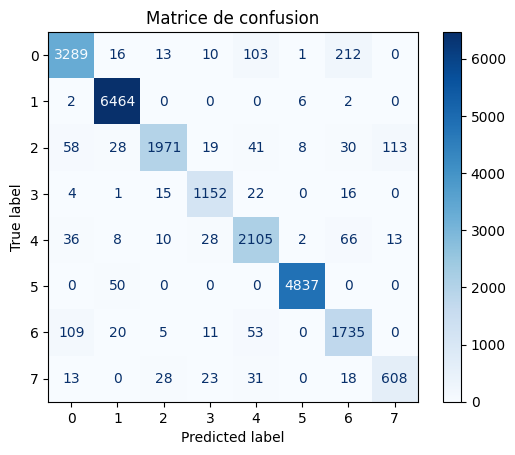


[Training] ExtraTrees-4
>>> Training time: 0:00:02.926126
>>> Training accuracy: 0.6657076936223545
>>> Testing time: 0:00:00.214705
>>> Metrics
- Accuracy  : 0.6659260841700492
- Recall    : 0.44765526565261343
- Precision : 0.5076248107079193
- MSE       : 4.732920316171758
- F1 Score  : 0.7254849828658726

[Training] DecisionTree-4
>>> Training time: 0:00:01.133617
>>> Training accuracy: 0.8184265246247188
>>> Testing time: 0:00:00.009733
>>> Metrics
- Accuracy  : 0.8188848536637471
- Recall    : 0.6497735517836623
- Precision : 0.6831798444603716
- MSE       : 2.4028626361888485
- F1 Score  : 0.835735474170423

[Training] KNeighbors-5
>>> Training time: 0:00:00.060952
>>> Training accuracy: 0.968852365625089
>>> Testing time: 0:00:14.396382
>>> Metrics
- Accuracy  : 0.9530442213202307
- Recall    : 0.939889655995354
- Precision : 0.9417085743392744
- MSE       : 0.9417218543046357
- F1 Score  : 0.9530703840387053

[Training] KNeighbors-10
>>> Training time: 0:00:00.061242
>>> Trai

In [ ]:
# NOTE: TRAIN_PCT is defind as a constant, but we could also create a list and have it loop through various percentages
mapper = {
    'Audio-streaming': 0,
    'Browsing': 1,
    'Chat': 2,
    'Email': 3,
    'File-transfer': 4,
    'P2p': 5,
    'Video-streaming': 6,
    'Voip': 7
}

# # (1) SELECT | ALL features
X = df.drop(['Label'], axis=1)
Y = df['Label'].map(mapper)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(Y.unique())

print(f'[*] Beginning evaluations: All Features')
evaluateIndividualClassifiers(X_train, y_train, TRAIN_PCT)

(87768, 70) (87768,)
[Training] RandomForest
>>> Training Time: 0:00:23.347168
>>> Training Accuracy : 74.72313371616079

[Training] ExtraTrees
>>> Training Time: 0:00:03.460608
>>> Training Accuracy : 65.81555920153131

[Training] DecisionTree
>>> Training Time: 0:00:01.462046
>>> Training Accuracy : 82.73174733388024

Selected Features "from All": ['Protocol', 'Connection Type', 'Src Private IP', 'Subflow Fwd Packets', 'Total Bwd packets', 'Idle Mean', 'Flow Duration', 'Flow Packets/s', 'Subflow Bwd Bytes', 'Fwd Packet Length Max', 'Timestamp', 'Total Fwd Packet', 'Fwd Seg Size Min', 'Bwd Packets/s', 'Idle Max', 'Flow IAT Min', 'Dst Private IP', 'Src Port', 'Total Length of Fwd Packet', 'Idle Min', 'Bwd Packet Length Min', 'PCA2', 'Total Length of Bwd Packet', 'Flow Bytes/s', 'FIN Flag Count', 'Dst Port']
[*] Beginning evaluations: Selected Features (from "All Features")"

[Training] RandomForest-4
>>> Training time: 0:00:14.667495
>>> Training accuracy: 0.776615623006107
>>> Testing

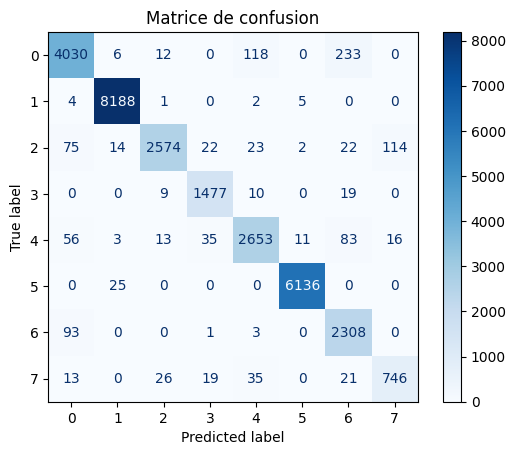


[Training] ExtraTrees-4
>>> Training time: 0:00:02.476912
>>> Training accuracy: 0.6570845866374989
>>> Testing time: 0:00:00.275997
>>> Metrics
- Accuracy  : 0.6595570139458573
- Recall    : 0.43764949299152855
- Precision : 0.42694046384471024
- MSE       : 5.028336067815149
- F1 Score  : 0.7235031626312651

[Training] DecisionTree-4
>>> Training time: 0:00:00.557234
>>> Training accuracy: 0.8286163522012578
>>> Testing time: 0:00:00.006896
>>> Metrics
- Accuracy  : 0.8267363959529669
- Recall    : 0.659356537661869
- Precision : 0.6895622845297988
- MSE       : 2.1235643970467595
- F1 Score  : 0.8461990258499522

[Training] KNeighbors-5
>>> Training time: 0:00:00.024898
>>> Training accuracy: 0.9709233433597667
>>> Testing time: 0:00:15.626693
>>> Metrics
- Accuracy  : 0.9549835931091059
- Recall    : 0.9415046950502863
- Precision : 0.9446509403488579
- MSE       : 0.9899849603500137
- F1 Score  : 0.9549951526864477

[Training] KNeighbors-10
>>> Training time: 0:00:00.028860
>>> T

In [ ]:
# (2) SELECT | choose from ALL features
X = df.drop(['Label'], axis=1)
Y = df['Label'].map(mapper)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

selected_features = selectFeatures(X, Y)
print(f'Selected Features "from All": {selected_features}')
Xse_all = X[selected_features]

print(f'[*] Beginning evaluations: Selected Features (from "All Features")"')
evaluateIndividualClassifiers(Xse_all, Y, TRAIN_PCT)

# Choix du model: Comparatif entre KNN, Random Forest et MLP

Lorsqu'il s'agit de choisir entre différents modèles d'apprentissage automatique, les points suivants mettent en lumière les avantages et les inconvénients des KNNClassifier, Random Forest, et MLP (Perceptron Multicouche).

## MLP (Perceptron Multicouche)
- **Avec Early Stopping**: Offre de meilleures performances grâce à l'arrêt anticipé, mais reste lent à entraîner et nécessite beaucoup de ressources.
- **Neural Network avec Keras et TensorFlow**: A un potentiel considérable, mais est souvent très lent à entraîner et demande des ressources intensives.

## KNN (K-Nearest Neighbors)
- **Temps d'entraînement rapide**: KNN est rapide à entraîner car il n'y a pas vraiment de phase d'apprentissage, mais la prédiction peut être lente car elle nécessite de comparer chaque nouveau point de données avec tous les autres points.
  
## Random Forest
- **Temps d'entraînement plus long que KNN**: Random Forest demande plus de temps que KNN pour s'entraîner, mais reste relativement rapide.
- **Prédiction très rapide**: Malgré un temps d'entraînement plus long, le temps de prédiction est très rapide, ce qui le rend adapté à des applications en temps réel, comme les pare-feu.

## Conclusion
Le Random Forest est un choix judicieux car il nécessite moins de ressources que les modèles de deep learning, et son temps de prédiction rapide le rend utilisable dans des systèmes en temps réel. Cela en fait un modèle idéal pour des applications qui nécessitent à la fois rapidité et efficacité.

# Cross Validation et Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(Xse_all, Y, test_size=0.2, random_state=42)

# Define a Random Forest Classifier
rf = RandomForestClassifier()

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20],      # Maximum depth of the trees
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=1, verbose=10)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Test the best model on the test data
y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Display the results
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Test Accuracy:", test_accuracy)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START max_depth=10, n_estimators=10..............................
[CV 1/3; 1/10] END max_depth=10, n_estimators=10;, score=0.967 total time=   2.8s
[CV 2/3; 1/10] START max_depth=10, n_estimators=10..............................
[CV 2/3; 1/10] END max_depth=10, n_estimators=10;, score=0.962 total time=   2.4s
[CV 3/3; 1/10] START max_depth=10, n_estimators=10..............................
[CV 3/3; 1/10] END max_depth=10, n_estimators=10;, score=0.974 total time=   1.8s
[CV 1/3; 2/10] START max_depth=10, n_estimators=50..............................
[CV 1/3; 2/10] END max_depth=10, n_estimators=50;, score=0.975 total time=   6.3s
[CV 2/3; 2/10] START max_depth=10, n_estimators=50..............................
[CV 2/3; 2/10] END max_depth=10, n_estimators=50;, score=0.978 total time=   6.2s
[CV 3/3; 2/10] START max_depth=10, n_estimators=50..............................
[CV 3/3; 2/10] END max_depth=10, n_estimato